Visualizing data
=========
### matplotlib

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7]

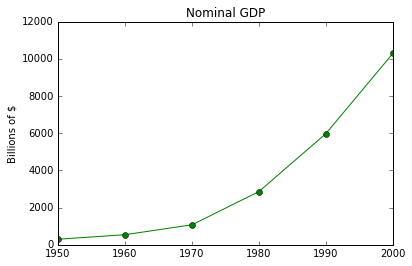

In [2]:
plt.plot(years, gdp, color='green',  marker='o', linestyle='solid' )
plt.title('Nominal GDP')
plt.ylabel('Billions of $')
plt.show()

### Bar Charts

In [3]:
movies = ['Annie Hall', 'Ben-Hur', 'Casablanca', 'Gandhi']
num_oscars = [5, 11, 3, 8]
xs = [i + 0.1 for i,_ in enumerate(movies)]

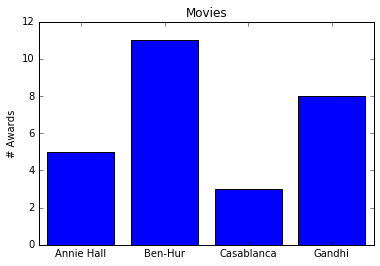

In [4]:
plt.bar(xs, num_oscars)
plt.xticks([i + 0.5 for i,_ in enumerate(movies)], movies)
plt.ylabel('# Awards')
plt.title('Movies')
plt.show()

### Histogram

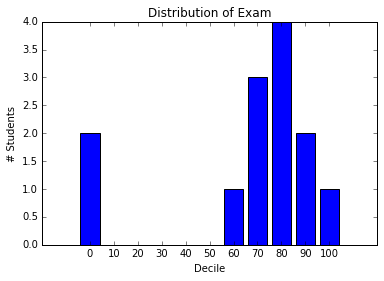

In [5]:
from collections import Counter

grades  = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade // 10*10                   #range of 10

histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], histogram.values(), width = 8)   #width of the bar

plt.xticks([10*i for i in range(11)])
plt.xlabel('Decile')
plt.ylabel('# Students')
plt.title('Distribution of Exam')
plt.show()

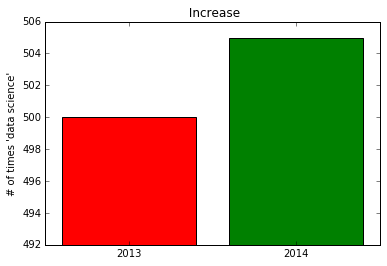

In [6]:
mentions = [500, 505]
years = [2013, 2014]

plt.bar([2012.6, 2013.6], mentions, width = 0.8, color =['red','green'])
plt.xticks(years)
plt.ylabel("# of times 'data science'")

plt.ticklabel_format(useOffset = False)                   # off in the corner
plt.axis([2012.5,2014.5, 492, 506])                       #limits on axis

plt.title(' Increase')
plt.show()

### Line Charts

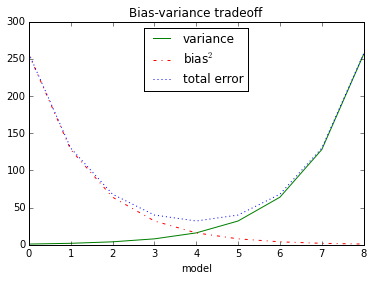

In [39]:
variance = [1,2,4,8,16,32,64,128,256]
bias_squared = [256,128,64,32,16,8,4,2,1]
total_error = [x+y for x,y in zip(variance, bias_squared)]
xs = [i for i,_ in enumerate(variance)]

plt.plot(xs, variance,     'g-' , label = 'variance')           #select line style
plt.plot(xs, bias_squared, 'r-.', label = 'bias$^2$')           #accepts Latex syntaxis
plt.plot(xs, total_error,  'b:' , label = 'total error')

plt.legend(loc = 'upper center')                                #legend location
plt.xlabel('model')
plt.title('Bias-variance tradeoff')
plt.show()

### Scatterplots

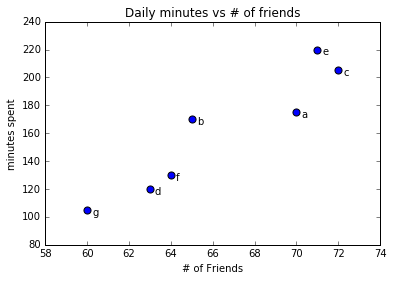

In [7]:
friends = [70, 65, 72, 63, 71, 64, 60]
minutes = [175, 170, 205, 120, 220, 130, 105]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

plt.scatter(friends, minutes, s =50)                            #size of the marker

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,                                         #add text to the plot
                xy = (friend_count, minute_count),              #label position
                xytext = (5, -5),                               #but slightly offset    
                textcoords = 'offset points')
    
plt.title('Daily minutes vs # of friends')
plt.xlabel('# of Friends')
plt.ylabel('minutes spent')
plt.show()